# Project 3

In this project, you will perform a logistic regression on the admissions data we've been working with in projects 1 and 2.

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from pandas import tseries
import pylab as pl
import numpy as np


In [5]:
df_raw = pd.read_csv("../assets/admissions.csv")
df = df_raw.dropna() 
print(df.head())

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


In [16]:
df.shape

(397, 4)

## Part 1. Frequency Tables

#### 1. Let's create a frequency table of our variables

In [32]:
# frequency table for prestige and whether or not someone was admitted
pd.crosstab(df['admit'] == 1, df['prestige'], margins=True)


prestige,1.0,2.0,3.0,4.0,All
admit,,,,,
False,28,95,93,55,271
True,33,53,28,12,126
All,61,148,121,67,397


## Part 2. Return of dummy variables

#### 2.1 Create class or dummy variables for prestige 

In [45]:
# create three dummy variables using get_dummies, then exclude the first dummy column
prestige_dummies = pd.get_dummies(df.prestige, prefix='prestige')

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
data = pd.concat([df, prestige_dummies], axis=1)
data.head()

prestige_dummies.head()

,prestige_1.0,prestige_2.0,prestige_3.0,prestige_4.0
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1


#### 2.2 When modeling our class variables, how many do we need? 



Answer: When modeling class varibale you need at least 3 variables 

## Part 3. Hand calculating odds ratios

Develop your intuition about expected outcomes by hand calculating odds ratios.

In [113]:
cols_to_keep = ['admit']
handCalc = df[cols_to_keep].join(prestige_dummies.loc[:, 'prestige_1':])
handCalc.head()

,admit,prestige_1.0,prestige_2.0,prestige_3.0,prestige_4.0
0,0,0,0,1,0
1,1,0,0,1,0
2,1,1,0,0,0
3,1,0,0,0,1
4,0,0,0,0,1


In [52]:
# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
data = pd.concat([df, prestige_dummies], axis=1)
data.head()

,admit,gre,gpa,prestige,prestige_1.0,prestige_2.0,prestige_3.0,prestige_4.0
0,0,380.0,3.61,3.0,0,0,1,0
1,1,660.0,3.67,3.0,0,0,1,0
2,1,800.0,4.00,1.0,1,0,0,0
3,1,640.0,3.19,4.0,0,0,0,1
4,0,520.0,2.93,4.0,0,0,0,1


In [87]:
#crosstab prestige 1 admission 
# frequency table cutting prestige and whether or not someone was admitted
ds_cross_ad_pres1 = pd.crosstab(data['admit'], data['prestige_1.0'])
ds_cross_ad_pres2 = pd.crosstab(data['admit'], data['prestige_2.0'])
ds_cross_ad_pres3 = pd.crosstab(data['admit'], data['prestige_3.0'])
ds_cross_ad_pres4 = pd.crosstab(data['admit'], data['prestige_4.0'])

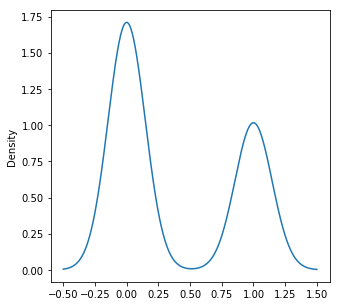

In [108]:
handCalc['prestige_2.0'].plot(kind="density", figsize=(5,5))

#### 3.1 Use the cross tab above to calculate the odds of being admitted to grad school if you attended a #1 ranked college

In [118]:
pd.crosstab(data['admit'], data['prestige_1.0'])

prestige_1.0,0,1
admit,,
0,243,28
1,93,33


In [122]:
# Calculating odds of P(A happens) = P( A happens) / P(A doesn't happen)
# Number of admitted = 33 not admitted = 28
# odds of admittion P(A happens) = 33/28 (presiges school)
odd_of_admit = 33/28
print(odd_of_admit)

1.1785714285714286


#### 3.2 Now calculate the odds of admission if you did not attend a #1 ranked college

In [123]:
# Calculating odds of P(A happens) = P( A happens) / P(A doesn't happen)
# Number of admitted = 93 not admitted = 243 
# odds of admittion P(A happens) = 93/243 (non presiges school)
odd_of_not_admit = 93/243
print(odd_of_not_admit)

0.38271604938271603


#### 3.3 Calculate the odds ratio

In [126]:
# Calculating odds ratio od OR = P1(A x B happens) / P2(C x D Not happens)
# Number of admitted = 93 not admitted = 243 
# odds of admittion P(A happens) = 93/243 (non presiges school)
OR = odd_of_admit / odd_of_not_admit
print(OR)

3.079493087557604


#### 3.4 Write this finding in a sentenance: 

Answer: For students that attended a presigious under grade college the odds are 3.079 time higher of addmission than students that attened non-presigious colleges. 

#### 3.5 Print the cross tab for prestige_4

In [128]:
ds_cross_ad_pres4 = pd.crosstab(data['admit'], data['prestige_4.0'])
ds_cross_ad_pres4

prestige_4.0,0,1
admit,,
0,216,55
1,114,12


#### 3.6 Calculate the OR 

In [145]:
# Calculating odds of P(A happens) = P( A happens) / P(A doesn't happen)
# Number of admitted = 12 not admitted = 55
# odds of admittion P(A happens) = 12/55 (presiges school)
odd_of_admit_p4 = 12/55
print(odd_of_admit_p4)

# Calculating odds of P(A happens) = P( A happens) / P(A doesn't happen)
# Number of admitted = 93 not admitted = 243 
# odds of admittion P(A happens) = 93/243 (non presiges school)
odd_of_not_admit_p4 = 114/216
print(odd_of_not_admit_p4)

# Calculating odds ratio od OR = P1(A x B happens) / P2(C x D Not happens)
# Number of admitted = 93 not admitted = 243 
# odds of admittion P(A happens) = 93/243 (non presiges school)
OR = odd_of_admit_p4 / odd_of_not_admit_p4
print(OR)
print((1-OR)/.01,"Odds Ratio")

0.21818181818181817
0.5277777777777778
0.4133971291866028
58.660287081339725 Odss Ratio


#### 3.7 Write this finding in a sentence

Answer:  There is a 58.6% greater chance that studends come from a lower presige school will not be admitted into grad school.

## Part 4. Analysis

In [151]:
# create a clean data frame for the regression
cols_to_keep = ['admit', 'gre', 'gpa']
data = df[cols_to_keep].join(prestige_dummies.loc[:, 'prestige_2':])
data.head()

,admit,gre,gpa,prestige_2.0,prestige_3.0,prestige_4.0
0,0,380.0,3.61,0,1,0
1,1,660.0,3.67,0,1,0
2,1,800.0,4.00,0,0,0
3,1,640.0,3.19,0,0,1
4,0,520.0,2.93,0,0,1


We're going to add a constant term for our Logistic Regression. The statsmodels function we're going to be using requires that intercepts/constants are specified explicitly.

In [153]:
# manually add the intercept
data['intercept'] = 1.0

#### 4.1 Set the covariates to a variable called train_cols

In [178]:
# A covariate is a variable that is possibly predictive of the outcome under study.
# The alternative terms: explanatory variable, independent variable, or predictor, are used in a regression analysis.
# data.columns[1:] => sellects all columns starting at index 1
train_cols = data.columns[1:]
train_cols

Index(['gre', 'gpa', 'prestige_2.0', 'prestige_3.0', 'prestige_4.0',
       'intercept'],
      dtype='object')

#### 4.2 Fit the model

In [179]:
logit = sm.Logit(data['admit'], data[train_cols])
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.573854
         Iterations 6


#### 4.3 Print the summary results

In [181]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      391
Method:                           MLE   Df Model:                            5
Date:                Mon, 01 Jan 2018   Pseudo R-squ.:                 0.08166
Time:                        09:09:54   Log-Likelihood:                -227.82
converged:                       True   LL-Null:                       -248.08
                                        LLR p-value:                 1.176e-07
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
gre              0.0022      0.001      2.028      0.043    7.44e-05       0.004
gpa              0.7793      0.333      2.344      0.019       0.128       1.431
prestige_2.0    -0.6801      0.317     -2.14

#### 4.4 Calculate the odds ratios of the coeffiencents and their 95% CI intervals

hint 1: np.exp(X)

hint 2: conf['OR'] = params
        
           conf.columns = ['2.5%', '97.5%', 'OR']

In [231]:
result.params

gre             0.002218
gpa             0.779337
prestige_2.0   -0.680137
prestige_3.0   -1.338677
prestige_4.0   -1.553411
intercept      -3.876854
dtype: float64

In [200]:
print(np.exp(result.params)) # I'm not sure why this is done copied from the solution code

gre             1.002221
gpa             2.180027
prestige_2.0    0.506548
prestige_3.0    0.262192
prestige_4.0    0.211525
intercept       0.020716
dtype: float64


In [238]:
params = result.params                 
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print(np.exp(conf))

                  2.5%     97.5%        OR
gre           1.000074  1.004372  1.002221
gpa           1.136120  4.183113  2.180027
prestige_2.0  0.272168  0.942767  0.506548
prestige_3.0  0.133377  0.515419  0.262192
prestige_4.0  0.093329  0.479411  0.211525
intercept     0.002207  0.194440  0.020716


#### 4.5 Interpret the OR of Prestige_2

Answer: The OR or odd rario for prestige_2 is indicating that the studends odds of being accepted to grad school had a 51% chance of being accepted.

#### 4.6 Interpret the OR of GPA

Answer: OR for GPA indicates that there was an 18% chance that a students GPA score effected their chance of be accepted into grad school.

## Part 5: Predicted probablities


As a way of evaluating our classifier, we're going to recreate the dataset with every logical combination of input values. This will allow us to see how the predicted probability of admission increases/decreases across different variables. First we're going to generate the combinations using a helper function called cartesian (above).

We're going to use np.linspace to create a range of values for "gre" and "gpa". This creates a range of linearly spaced values from a specified min and maximum value--in our case just the min/max observed values.

In [239]:
def cartesian(arrays, out=None):
    """
    Generate a cartesian product of input arrays.
    Parameters
    ----------
    arrays : list of array-like
        1-D arrays to form the cartesian product of.
    out : ndarray
        Array to place the cartesian product in.
    Returns
    -------
    out : ndarray
        2-D array of shape (M, len(arrays)) containing cartesian products
        formed of input arrays.
    Examples
    --------
    >>> cartesian(([1, 2, 3], [4, 5], [6, 7]))
    array([[1, 4, 6],
           [1, 4, 7],
           [1, 5, 6],
           [1, 5, 7],
           [2, 4, 6],
           [2, 4, 7],
           [2, 5, 6],
           [2, 5, 7],
           [3, 4, 6],
           [3, 4, 7],
           [3, 5, 6],
           [3, 5, 7]])
    """

    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    m = n / arrays[0].size
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m,1:])
        for j in xrange(1, arrays[0].size):
            out[j*m:(j+1)*m,1:] = out[0:m,1:]
    return out

In [346]:
# instead of generating all possible values of GRE and GPA, we're going
# to use an evenly spaced range of 10 values from the min to the max 
gres = np.linspace(data['gre'].min(), data['gre'].max(), 10)
gres_int = gres.astype(int)
print(gres_int)
# array([ 220.        ,  284.44444444,  348.88888889,  413.33333333,
#         477.77777778,  542.22222222,  606.66666667,  671.11111111,
#         735.55555556,  800.        ])

gpas = np.linspace(data['gpa'].min(), data['gpa'].max(), 10)
gpas_int = gpas.astype(int)
print(gpas_int)
# array([ 2.26      ,  2.45333333,  2.64666667,  2.84      ,  3.03333333,
#         3.22666667,  3.42      ,  3.61333333,  3.80666667,  4.        ])


# enumerate all possibilities
# combos = pd.DataFrame(cartesian([gres, gpas, [1, 2, 3, 4], [1]])) 
# combos_int= pd.DataFrame(cartesian([gres_int, gpas_int, [1, 2, 3, 4], [1.]]))
combos_int_clean = combos_int.fillna(0)
combos_cartesian = combos_int_clean(cartesian(combos_int_clean))
 
# Convert the combos cartesian function

[220 284 348 413 477 542 606 671 735 800]
[2 2 2 2 3 3 3 3 3 4]


TypeError: slice indices must be integers or None or have an __index__ method

In [342]:
combos_int_clean = combos_int.fillna(0)

In [343]:
combos_int_clean

,0,1,2,3,4,5,6,7,8,9
0,220.0,284.0,348.0,413.0,477.0,542.0,606.0,671.0,735.0,800.0
1,2.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,4.0
2,1.0,2.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 5.1 Recreate the dummy variables

In [ ]:
# recreate the dummy variables
combos_dummies = pd.get_dummies(combos.prestige, prefix='prestige')

data = pd.concat([df, prestige_dummies], axis=1)
data.head()

combos_dummies.head()

# keep only what we need for making predictions
cols_to_keep = ['gre', 'gpa', 'prestige', 'intercept']
combos = combos[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_2.0':])





#### 5.2 Make predictions on the enumerated dataset

#### 5.3 Interpret findings for the last 4 observations

Answer: 

## Bonus

Plot the probability of being admitted into graduate school, stratified by GPA and GRE score.